In [247]:
import tensorflow as tf
import numpy as np
from typing import DefaultDict

import matplotlib
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

In [185]:
raw_dataset = tf.data.TFRecordDataset("/home/dennis/workspace/master-thesis/validation.record")
num_classes = 10

In [186]:
label_map = {
    0: {
        'id': 0,
        'name': 'car'
    },
    1: {
        'id': 1,
        'name': 'pedestrian'
    },
    2: {
        'id': 2,
        'name': 'bicycle'
    },
    3: {
        'id': 3,
        'name': 'motorcycle'
    },
    4: {
        'id': 4,
        'name': 'truck'
    },
    5: {
        'id': 5,
        'name': 'trailer'
    },
    6: {
        'id': 6,
        'name': 'bus'
    },
    7: {
        'id': 7,
        'name': 'construction_vehicle'
    },
    8: {
        'id': 8,
        'name': 'barrier'
    },
    9: {
        'id': 9,
        'name': 'traffic_cone'
    },
}

In [187]:
feature_description = {
        'id':
            tf.io.FixedLenFeature((), tf.string, default_value=''),
        'image/format':
            tf.io.FixedLenFeature((), tf.string, default_value='png'),
        'layers/height':
            tf.io.FixedLenFeature((), tf.int64, default_value=1),
        'layers/width':
            tf.io.FixedLenFeature((), tf.int64, default_value=1),
#         'layers/detections/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers/observations/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers/intensity/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers/ground_distance_z_max/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers/occlusions_z_upper_bound/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers/bba_occupied/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers/bba_free/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/detections/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/observations/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/intensity/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/ground_distance_z_max/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/occlusions_z_upper_bound/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/bba_occupied/encoded':
#             tf.io.FixedLenFeature((), tf.string),
#         'layers_prev/bba_free/encoded':
#             tf.io.FixedLenFeature((), tf.string),
        'boxes/aligned/x_min':
            tf.io.VarLenFeature(tf.float32),
        'boxes/aligned/x_max':
            tf.io.VarLenFeature(tf.float32),
        'boxes/aligned/y_min':
            tf.io.VarLenFeature(tf.float32),
        'boxes/aligned/y_max':
            tf.io.VarLenFeature(tf.float32),
        'boxes/inclined/x_c': tf.io.VarLenFeature(tf.float32),
        'boxes/inclined/y_c': tf.io.VarLenFeature(tf.float32),
        'boxes/inclined/w': tf.io.VarLenFeature(tf.float32),
        'boxes/inclined/h': tf.io.VarLenFeature(tf.float32),
        'boxes/inclined/sin_angle': tf.io.VarLenFeature(tf.float32),
        'boxes/inclined/cos_angle': tf.io.VarLenFeature(tf.float32),
        'boxes/class/label':
            tf.io.VarLenFeature(tf.int64),
        'boxes/class/text':
            tf.io.VarLenFeature(tf.string),
    }

In [188]:
def _parse_function(example_proto):
  # Parse the input `tf.Example` proto using the dictionary above.
  return tf.io.parse_single_example(example_proto, feature_description)

In [190]:
# only look at 400 frames
dataset_slice = raw_dataset.take(400)
parsed_dataset = dataset_slice.map(_parse_function)
parsed_dataset

<MapDataset shapes: {boxes/aligned/x_max: (None,), boxes/aligned/x_min: (None,), boxes/aligned/y_max: (None,), boxes/aligned/y_min: (None,), boxes/class/label: (None,), boxes/class/text: (None,), boxes/inclined/cos_angle: (None,), boxes/inclined/h: (None,), boxes/inclined/sin_angle: (None,), boxes/inclined/w: (None,), boxes/inclined/x_c: (None,), boxes/inclined/y_c: (None,), id: (), image/format: (), layers/height: (), layers/width: ()}, types: {boxes/aligned/x_max: tf.float32, boxes/aligned/x_min: tf.float32, boxes/aligned/y_max: tf.float32, boxes/aligned/y_min: tf.float32, boxes/class/label: tf.int64, boxes/class/text: tf.string, boxes/inclined/cos_angle: tf.float32, boxes/inclined/h: tf.float32, boxes/inclined/sin_angle: tf.float32, boxes/inclined/w: tf.float32, boxes/inclined/x_c: tf.float32, boxes/inclined/y_c: tf.float32, id: tf.string, image/format: tf.string, layers/height: tf.int64, layers/width: tf.int64}>

In [191]:
data = DefaultDict(lambda: {
        x_c: [],
        y_c: [],
        w: [],
        h: [],
        sin: [],
        cos: [],
    })

In [192]:
data_list = []

for elem in parsed_dataset:
    frame_data = np.vstack(
        [elem['boxes/class/label'].values.numpy(),
        elem['boxes/inclined/x_c'].values.numpy(),
        elem['boxes/inclined/y_c'].values.numpy(),
        elem['boxes/inclined/w'].values.numpy(),
        elem['boxes/inclined/h'].values.numpy(),
        elem['boxes/inclined/cos_angle'].values.numpy(),
        elem['boxes/inclined/sin_angle'].values.numpy(),
        elem['boxes/aligned/x_min'].values.numpy(),
        elem['boxes/aligned/x_max'].values.numpy(),
        elem['boxes/aligned/y_min'].values.numpy(),
        elem['boxes/aligned/y_max'].values.numpy()],
    )
    
    data_list.append(frame_data)

In [193]:
data = np.concatenate(data_list, axis=1)

(array([3243., 1871.,  129.,  126.,  623.,  150.,  144.,   89., 1517.,
         947.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

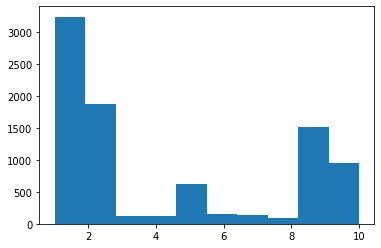

In [194]:
plt.hist(data[0])

(array([ 283.,  581.,  905., 1191., 1543., 1453., 1200.,  819.,  584.,
         280.]),
 array([0.00637746, 0.10521537, 0.20405329, 0.30289121, 0.40172913,
        0.50056705, 0.59940497, 0.69824288, 0.7970808 , 0.89591872,
        0.99475664]),
 <a list of 10 Patch objects>)

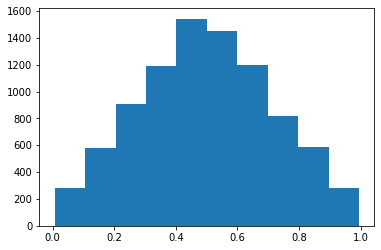

In [195]:
plt.hist(data[1])

(array([ 131.,  292.,  546., 1121., 2605., 1795., 1497.,  529.,  229.,
          94.]),
 array([0.01052048, 0.10818041, 0.20584033, 0.30350026, 0.40116018,
        0.49882011, 0.59648003, 0.69413996, 0.79179988, 0.88945981,
        0.98711973]),
 <a list of 10 Patch objects>)

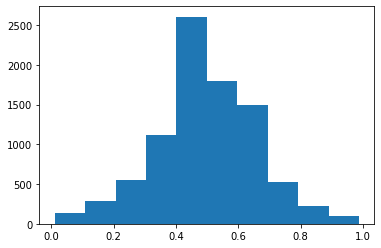

In [196]:
plt.hist(data[2])

# Location heatmap

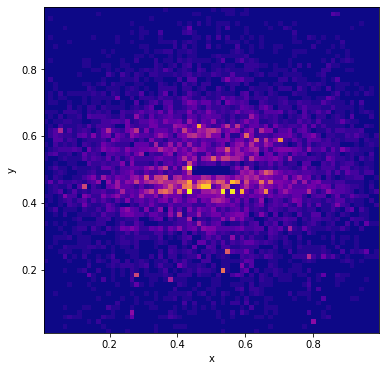

In [277]:
fig, ax = plt.subplots(figsize=(6,6))
ax.hist2d(data[1], data[2], bins=[70,70], cmap='plasma')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig("plots/location_heatmap.pdf", dpi=300)

## Location heatmap without traffic cones

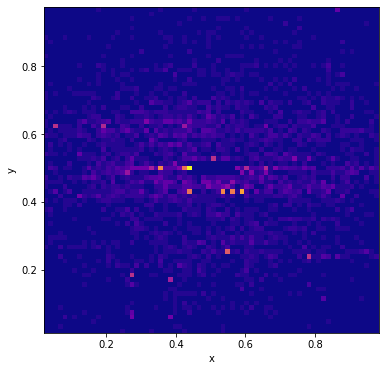

In [276]:
fig, ax = plt.subplots(figsize=(6,6))
mask = data[0] == 1.0
ax.hist2d(data[1][mask], data[2][mask], bins=[70,70], cmap='plasma')
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.savefig("plots/location_heatmap_cars.pdf", dpi=300)

(array([3.058e+03, 1.447e+03, 3.006e+03, 1.236e+03, 5.400e+01, 1.600e+01,
        9.000e+00, 1.000e+01, 1.000e+00, 2.000e+00]),
 array([0.00174 , 0.010159, 0.018578, 0.026997, 0.035416, 0.043835,
        0.052254, 0.060673, 0.069092, 0.077511, 0.08593 ]),
 <a list of 10 Patch objects>)

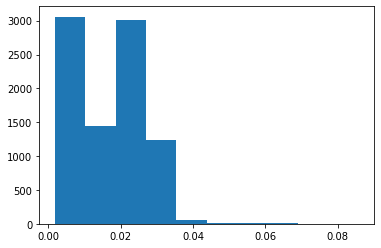

In [197]:
plt.hist(data[])

(array([4.547e+03, 3.230e+02, 3.287e+03, 2.520e+02, 1.000e+02, 1.340e+02,
        1.140e+02, 4.600e+01, 3.200e+01, 4.000e+00]),
 array([0.0016  , 0.021206, 0.040812, 0.060418, 0.080024, 0.09963 ,
        0.119236, 0.138842, 0.158448, 0.178054, 0.19766 ]),
 <a list of 10 Patch objects>)

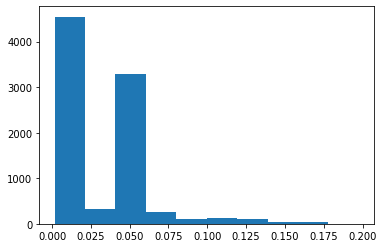

In [198]:
plt.hist(data[4])

(array([3730.,  325.,  188.,  229.,  198.,  215.,  241.,  232.,  410.,
        3071.]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

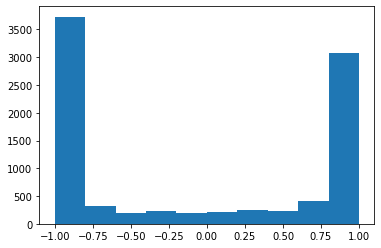

In [199]:
plt.hist(data[5])

In [200]:
aligned_width = (data[8] - data[7]) * 100
aligned_height = (data[10] - data[9]) * 100

(array([4.038e+03, 1.999e+03, 2.319e+03, 2.220e+02, 7.500e+01, 1.010e+02,
        5.900e+01, 1.300e+01, 1.000e+01, 3.000e+00]),
 array([ 0.21654963,  2.19498813,  4.17342663,  6.15186512,  8.13030362,
        10.10874212, 12.08718061, 14.06561911, 16.04405761, 18.0224961 ,
        20.0009346 ]),
 <a list of 10 Patch objects>)

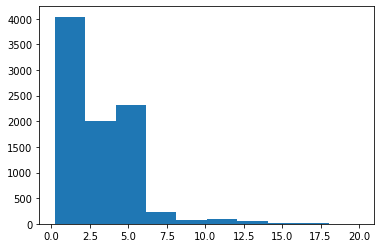

In [201]:
plt.hist(aligned_width)

(array([4859., 1974., 1570.,  168.,   90.,   44.,   64.,   26.,   34.,
          10.]),
 array([ 0.18544197,  2.01150954,  3.8375771 ,  5.66364467,  7.48971224,
         9.31577981, 11.14184737, 12.96791494, 14.79398251, 16.62005007,
        18.44611764]),
 <a list of 10 Patch objects>)

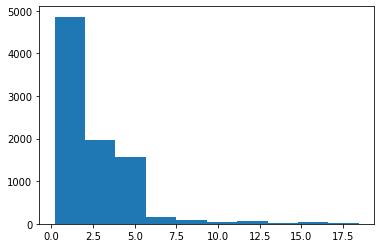

In [202]:
plt.hist(aligned_height)

In [381]:
grid_cell_size = 0.125 # one cell = 12.5 cm
levels = [
    {"level": 2,
    "aspect_ratios": [0.5, 1.0, 2.0],
    "anchor_size": 2.0,
    "num_scales": 2},
    {"level": 3,
    "aspect_ratios": [0.5, 1.0, 2.0],
    "anchor_size": 2.0,
    "num_scales": 2},
    {"level": 4,
    "aspect_ratios": [0.5, 1.0, 2.0],
    "anchor_size": 2.0,
    "num_scales": 2},
    {"level": 5,
    "aspect_ratios": [0.5, 1.0, 2.0],
    "anchor_size": 2.0,
    "num_scales": 2}
]

colors_anchors = ['gray', 'black', 'gray', 'black', 'gray']
linestyle_anchors = ['-', ':', '-', ':', '-']
iou_factor = 0.5

In [382]:
def make_anchors(levels):
    anchors = []
    for level in levels:
        anchors_level = []
        for scale in range(level["num_scales"]):
            for aspect_ratio in level["aspect_ratios"]:
                stride = 2**level["level"]
                intermidiate_scale = 2**(scale / float(level["num_scales"]))
                base_anchor_size = level["anchor_size"] * stride * intermidiate_scale
                aspect_x = aspect_ratio**0.5
                aspect_y = aspect_ratio**-0.5
                anchor_size_x = base_anchor_size * aspect_x
                anchor_size_y = base_anchor_size * aspect_y

                anchors_level.append([anchor_size_x * grid_cell_size, anchor_size_y * grid_cell_size])
        anchors.append(anchors_level)

    return anchors

In [383]:
anchors = make_anchors(levels)

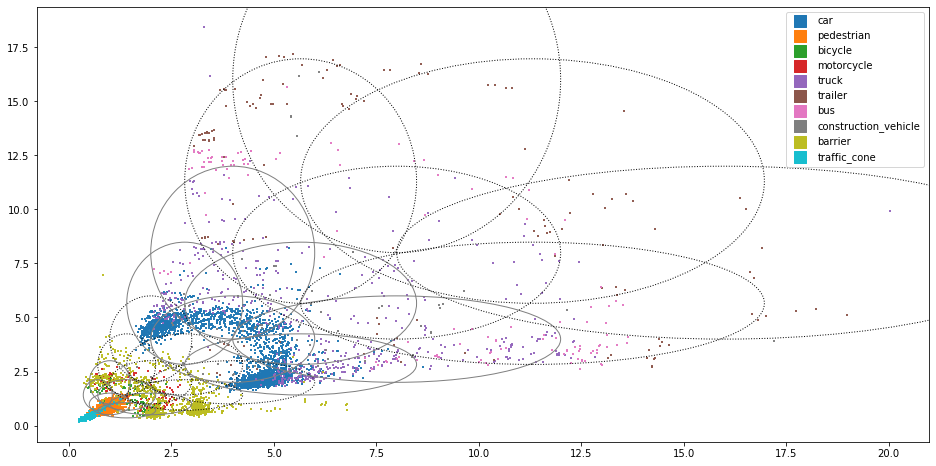

In [384]:
fig, ax = plt.subplots(figsize=(16,8))

for label in range(num_classes):
    mask = (data[0] == float(label + 1))
    ax.scatter(x=aligned_width[mask], y=aligned_height[mask], marker=",", s=1, label=label_map[label]["name"])

ax.legend(markerscale=12)
    
for i, level_anchors in enumerate(anchors):
    color = colors_anchors[i]
    for anchor in level_anchors:
        circle1 = matplotlib.patches.Ellipse((anchor[0], anchor[1]), width=anchor[0] * iou_factor * 2.0, height=anchor[1] * iou_factor * 2.0, color=color, fill=False, linestyle=linestyle_anchors[i])
        ax.add_artist(circle1)
        
plt.savefig("plots/aligned_anchors.pdf")

# Now let's look only at specific FPN levels

In [323]:
def plot_fpn_level_anchors(level: int, limits):
    fig, ax = plt.subplots(figsize=(8,8))

    for label in range(num_classes):
        mask = (data[0] == float(label + 1))
        ax.scatter(x=aligned_width[mask], y=aligned_height[mask], marker=",", s=2, label=label_map[label]["name"])

    ax.legend(markerscale=6, loc='upper right')

    i = level - 2
    level_anchors = anchors[i]
    color = "black"
    for anchor in level_anchors:
        circle1 = matplotlib.patches.Ellipse((anchor[0], anchor[1]), width=anchor[0] * iou_factor * 2.0, height=anchor[1] * iou_factor * 2.0, color=color, fill=False)
        ax.add_artist(circle1)

    ax.set_xlim(limits)
    ax.set_xlabel("width in m")
    ax.set_ylim(limits)
    ax.set_ylabel("height in m")

    plt.savefig(f"plots/fpn{level}.pdf", dpi=500)

## FPN 2

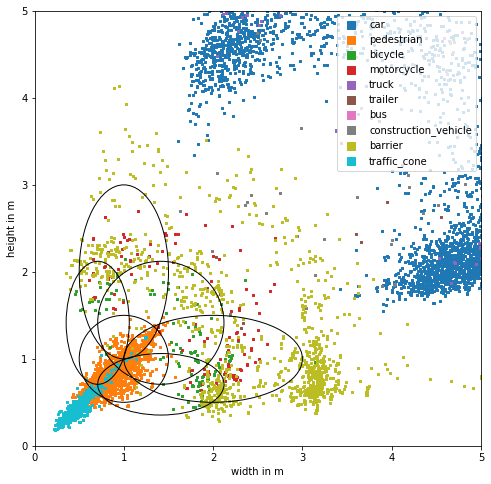

In [324]:
plot_fpn_level_anchors(2, [0.0, 5.0])

## FPN 3

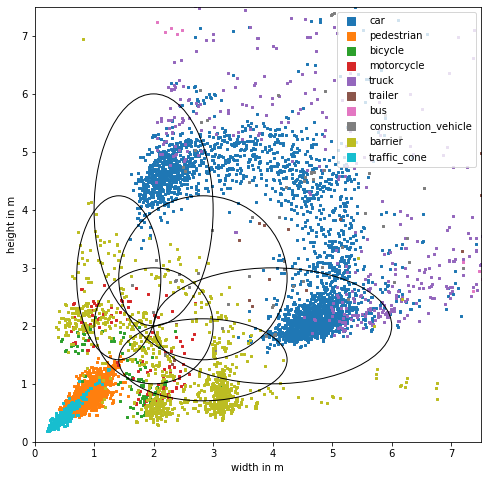

In [325]:
plot_fpn_level_anchors(3, [0.0, 7.5])

## FPN 4

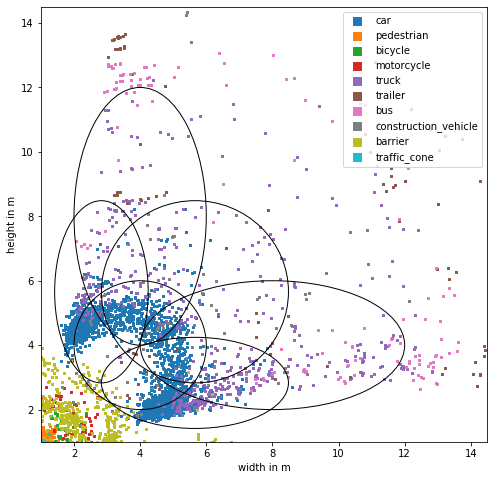

In [326]:
plot_fpn_level_anchors(4, [1.0, 14.5])

# FPN 5

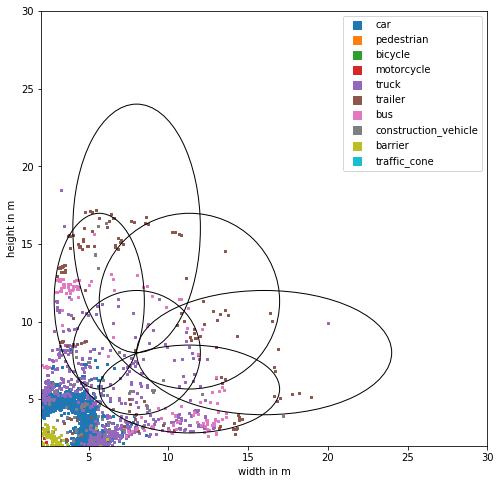

In [327]:
plot_fpn_level_anchors(5, [2.0, 30.0])

## Box size heatmap

Text(0, 0.5, 'height')

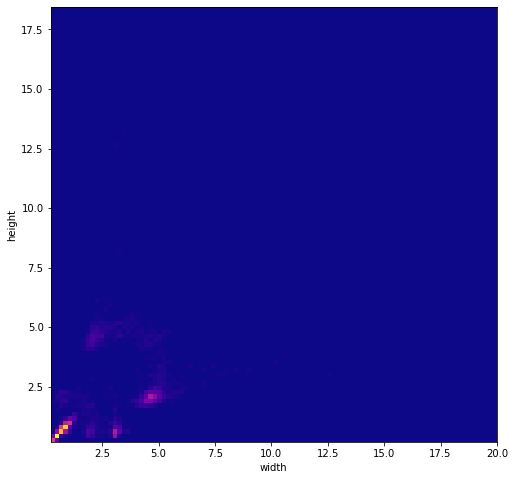

In [245]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist2d(aligned_width, aligned_height, bins=100, cmap='plasma', density=True)
ax.set_xlabel("width")
ax.set_ylabel("height")

Text(0, 0.5, 'height')

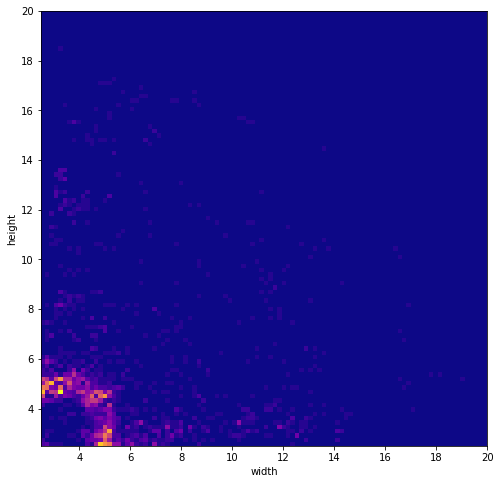

In [244]:
fig, ax = plt.subplots(figsize=(8,8))
ax.hist2d(aligned_width, aligned_height, bins=100, cmap='plasma', range=[[2.5,20.0],[2.5,20.0]])
ax.set_xlabel("width")
ax.set_ylabel("height")

# 3D view with angle

In [288]:
width_scaled = data[3] * 800 * 0.125
height_scaled = data[4] * 800 * 0.125

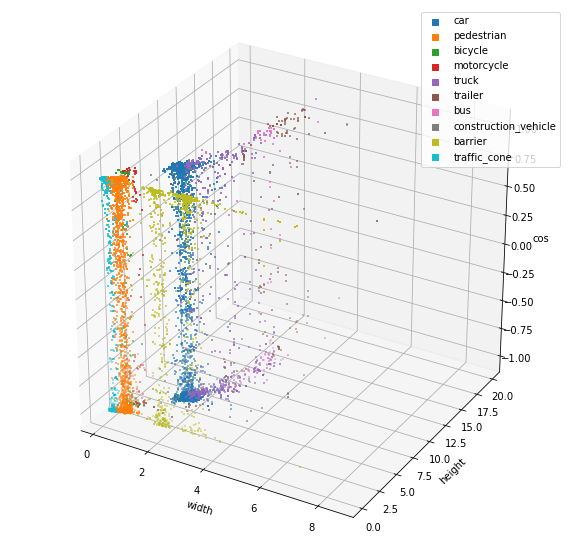

In [289]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for label in range(num_classes):
    mask = (data[0] == float(label + 1))
    ax.scatter(width_scaled[mask], height_scaled[mask], data[5][mask], marker=",", s=1, label=label_map[label]["name"])

ax.legend(markerscale=6, loc='upper right')

ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('cos')

plt.savefig("plots/3d_anchors.pdf", dpi=500)
plt.show()


## Only cars, trucks & busses

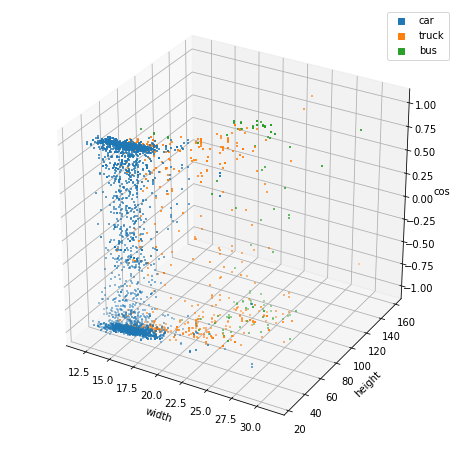

In [270]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for label in [0, 4, 6]:
    mask = (data[0] == float(label + 1))
    ax.scatter(width_scaled[mask], height_scaled[mask], data[5][mask], marker=",", s=1, label=label_map[label]["name"])

ax.legend(markerscale=6, loc='upper right')

ax.set_xlabel('width')
ax.set_ylabel('height')
ax.set_zlabel('cos')
plt.savefig("plots/3d_filtered.pdf", dpi=500)

plt.show()

# Rotated anchor matching

In [400]:
levels = [
    {"level": 2,
    "aspect_ratios": [1.0, 0.3],
    "anchor_size": 1.7,
    "num_scales": 2},
    {"level": 3,
    "aspect_ratios": [1.0, 0.4],
    "anchor_size": 2.0,
    "num_scales": 2},
    {"level": 4,
    "aspect_ratios": [1.0, 0.3],
    "anchor_size": 2.0,
    "num_scales": 2},
    {"level": 5,
    "aspect_ratios": [0.25],
    "anchor_size": 1.5,
    "num_scales": 1}
]
anchors = make_anchors(levels)

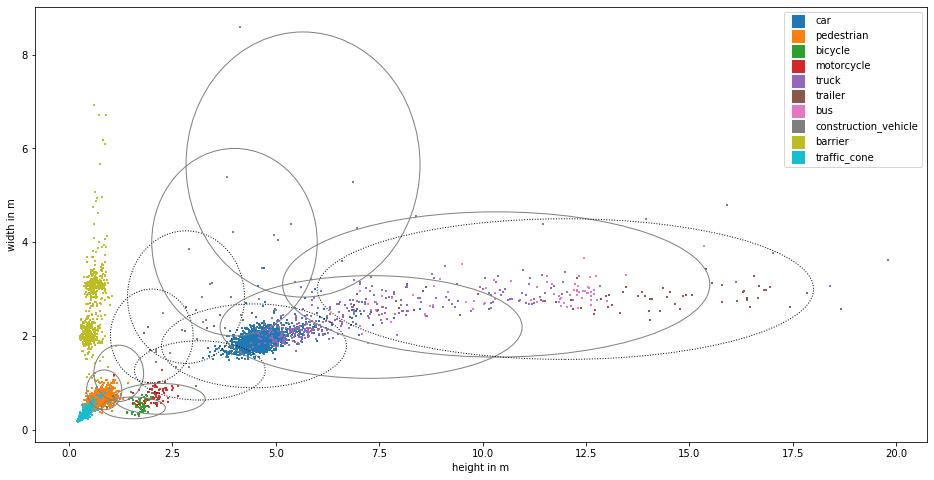

In [402]:
fig, ax = plt.subplots(figsize=(16,8))

for label in range(num_classes):
    mask = (data[0] == float(label + 1))
    ax.scatter(x=data[4][mask] * 800 * 0.125, y=data[3][mask] * 800 * 0.125, marker=",", s=1, label=label_map[label]["name"])

ax.legend(markerscale=12)
ax.set_xlabel("height in m")
ax.set_ylabel("width in m")
    
for i, level_anchors in enumerate(anchors):
    color = colors_anchors[i]
    for anchor in level_anchors:
        circle1 = matplotlib.patches.Ellipse((anchor[1], anchor[0]), width=anchor[1] * iou_factor * 2.0, height=anchor[0] * iou_factor * 2.0, color=color, fill=False, linestyle=linestyle_anchors[i])
        ax.add_artist(circle1)
        
plt.savefig("plots/rotated_anchors.pdf")

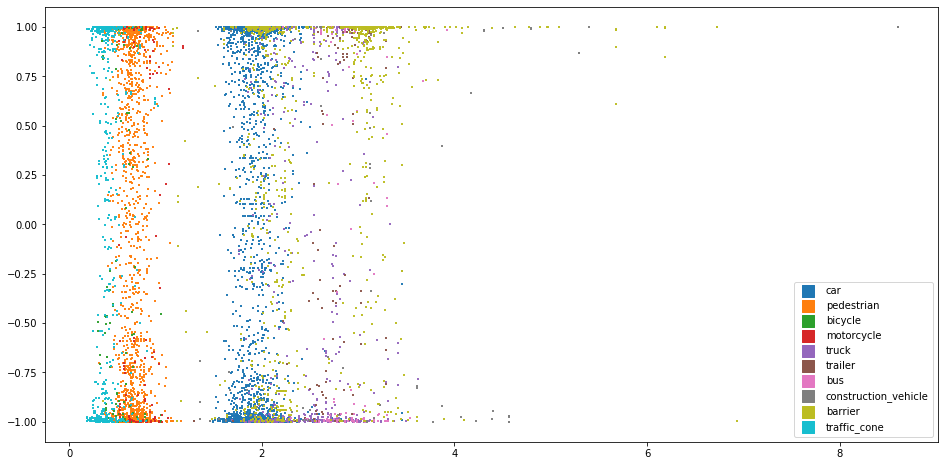

In [295]:
fig, ax = plt.subplots(figsize=(16,8))

for label in range(num_classes):
    mask = (data[0] == float(label + 1))
    ax.scatter(x=data[3][mask] * 800 * 0.125, y=data[5][mask], marker=",", s=1, label=label_map[label]["name"])

ax.legend(markerscale=12)